In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nombres_columnas = ['Id_number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass']
df = pd.read_csv('glass.data',header=None, names=nombres_columnas)

In [3]:
df.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
#no hay registros nulos

In [7]:
df['Id_number'].nunique()
#hay 214 elementos distintos en esta columna, por lo que es una primary key
#nota: en una primary key no se repiten elementos, de modo que, no hay filas repetidas en este 
#ya que tiene una primary key 
#esta columna no es de utilidad para ser ingresada como data para un modelo de ml
#dao que, ofrece un maximo de variabilidad, en otras palabras no aporta con ningun patron 

214

In [8]:
df.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: >

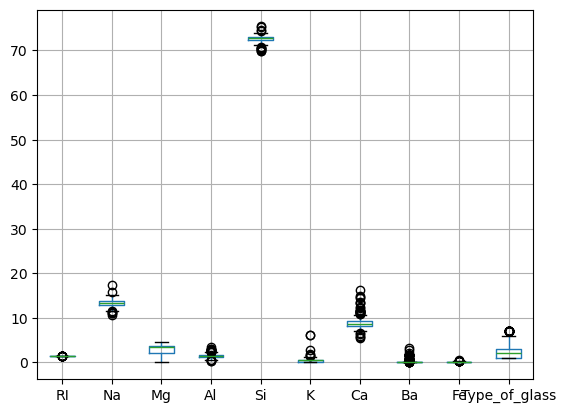

In [9]:
df.iloc[:,1:].boxplot()

In [10]:
#comentar que no se encuentran errores ni 

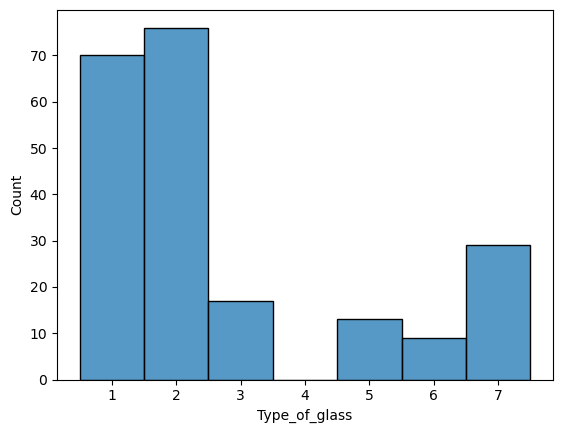

In [11]:
sns.histplot(df,x='Type_of_glass',discrete=True)
plt.show()

In [12]:
#info desde la medatada. No hay registros del tipo 4
target_names = {
1: 'building_windows_float_processed',
2: 'building_windows_non_float_processed',
3: 'vehicle_windows_float_processed',
4: 'vehicle_windows_non_float_processed (none in this database)',
5: 'containers',
6: 'tableware',
7: 'headlamps' }

In [13]:
#existe una desproporcion en la frecuencia de de la columna target, lo que muy probablemente lleve a
#malas predicciones al momento especifico de predecir alguna de las categorias minoritarias 
#para esto se puede truncar muestras de las categorias mayoritarias,
#tambien se puede rellenar con repeticion de las categorias minoritarias 
#tambien se puede optmizar para una metrica diferente del accuracy, el cual es ciego ante este sesgo 
#(f1-score)

In [14]:
df_aux = pd.DataFrame()
frecuencias = df['Type_of_glass'].value_counts().to_dict()
frecuencias = list(frecuencias.items())
mayor_cat = frecuencias[0][0]
mayor_cant= frecuencias[0][1]
for categoria,cantidad in frecuencias[1:]:
    filtro = df['Type_of_glass'] == categoria
    df_temp = df[filtro].sample(
        n=mayor_cant-cantidad, 
        replace=True, 
        random_state=17, 
        axis=0, 
        ignore_index=True
    )
    df_aux = pd.concat([df_aux,df_temp],ignore_index=True)
df = pd.concat([df,df_aux],ignore_index=True)


In [15]:
df.shape

(456, 11)

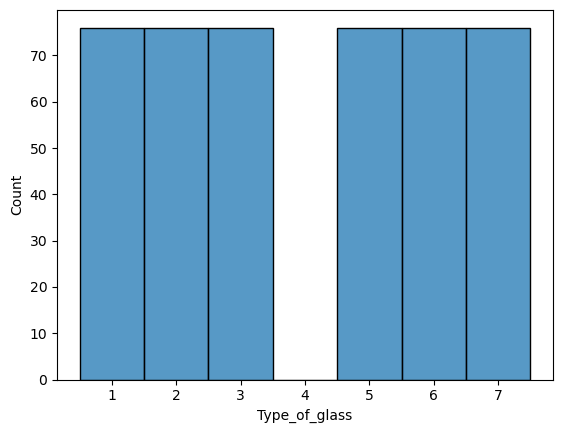

In [16]:
sns.histplot(df,x='Type_of_glass',discrete=True)
plt.show()

In [17]:
#ML 

In [18]:
X = df[nombres_columnas[1:-1]]

In [19]:
#data y target
X = df[nombres_columnas[1:-1]]
y = df['Type_of_glass']

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
#NORMALIZACION 
normalizador = MinMaxScaler()
X = normalizador.fit_transform(X)


In [22]:
from sklearn.decomposition import PCA

In [23]:
#PCA (OPCIONAL)
pca = PCA(2,random_state=17)
X_pca = pca.fit_transform(X)

In [24]:
X.shape

(456, 9)

In [25]:
X_pca.shape

(456, 2)

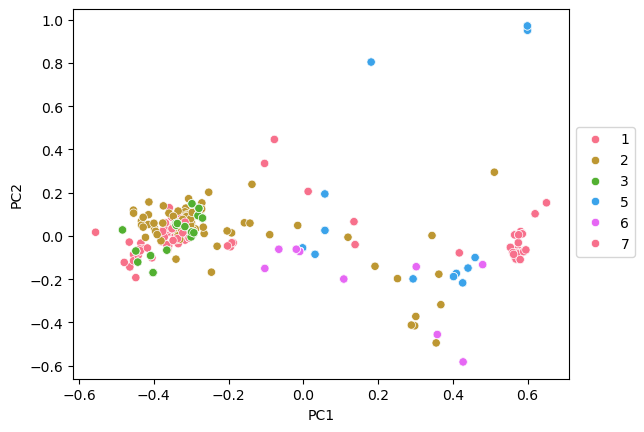

In [27]:
df_pca = pd.DataFrame(X_pca,columns=['PC1', 'PC2'])
df_pca['Type_of_glass'] = y


sns.scatterplot(
   data=df_pca,
    x='PC1',
    y='PC2',
    hue='Type_of_glass',
    palette='husl'
)
plt.legend(bbox_to_anchor=(1, .7, 0, 0))
plt.show()

In [ ]:
#Las categorias parecieran no ser linealmente separable, por lo que se recomienda usar modelos de clasificacion no lineales

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=17)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [32]:
#usar estos 3 modelos 
#Adaboost class sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
#Randomforest class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)[source]
#class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)[source]


In [ ]:
#evaluar metricas